# LeetCode Add Nums

LeetCode AddNums:



This was a very interesting problem because right off the bat you think adding integers is easy, well not so much.



They tell you essentially off the bat with typing that you are using a singly linked-list.  So I created a dummy list to store the answer, and then a carry over which starts at zero.  Just like old school math, you use the carry over to represent the digit to carry and add to the next numbers.



So you first check if there is a value, and if there is return it, otherwise return zero.  I used a what resembles a list comprehension but is a ternary operator.  Then you add the numbers, plus the carry, which will be zero on the first.  Due to integer division we need to calculate the remainder and carry separately.  We add the numbers, we calculate the carry by dividing by 10, and we calc the remainder by modulo 10.



We are going through both lists at the same time, and, which is the current node, and then we move to current.next.  Current is a ListNode, which is the node class that defines a node, which is a value and a pointer.  current.next = ListNode(val) we create a new ListNode with the sum value, then you set next pointer which is pointer at current, to the new node.  So dummy list looks like [], [7] right now, the next pointer is used to link the value.  Linked-Lists allow you to be able to point to different values without moving the memory.  Now current will append to the list.



Using Python lists, this whole problem is counter-intuitive, as python lists are Dynamic Arrays.  In a normal linked list, you need to traverse through the list to get the next value, as they are stored separately in memory, not contiguously like in arrays.  Finally we move to current.next, and we update the l1, and l2 pointers to point to the new node.  Which is l1.next, unless there is no value then return none.  Then we loop through checking if there is another digit, we add it, create the new node, have the pointer change to point to it, update the pointers and move on down l1, and l2.

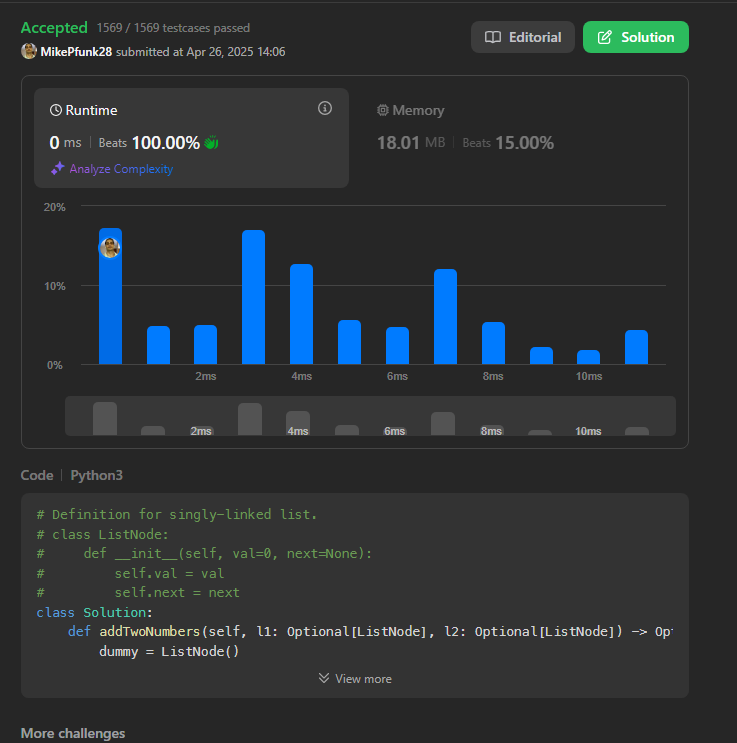


In [ ]:
from typing import Optional
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        dummy = ListNode()
        current: Optional[ListNode] = dummy
        carry = 0

        while l1 or l2 or carry:
            # Get the values one at a time and add them.
            # List Comprehension
            val1 = l1.val if l1 else 0
            val2 = l2.val if l2 else 0

            # New value
            # This is almost counter-intuitive, as we are adding the numbers digit by digit.
            # The carry is going to have the remainder cut off from rounding using int types.
            # So we use modulo to get the remainder to know what the digit is to add.
            # calculate the value or the sum to store in the new LinkedList
            val = val1 + val2 + carry
            # calculate the carry separately.
            carry = val // 10
            # Get modulo or remainder
            val = val % 10
            # If val1 + val2 + carry >= 10:
            #    return carry = 1

            current.next = ListNode(val)


            # Update pointers
            current = current.next
            l1 = (l1.next if l1 else None)
            l2 = l2.next if l2 else None

        return dummy.next

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        # a set which cannot have dupes

        new_s = self.convert_toset(s)
        print(new_s)
        return len(new_s)

    def convert_toset(self, s):
        s = set(s)
        print(s)
        return s

s = Solution()
print(s.lengthOfLongestSubstring("pwwkew"))  # "abcabcbb"

4


I really want to see if I can get this one faster.  I am sure there is something I am not seeing.  LeetCode Sliding Window problem.  These are all pretty interesting, and one issue I was having was at first I used a set, and it came back with all non duplicates.  That was clearly wrong, however a python set definitely can be utilized, we are also going to have to use join() method to join the strings in the max_substring list.  "".join(window).


I made the window sliding, so I would check if it was in the new list, and by adding it to the window the window gets larger.  Then we just need to remove it from the window to make it smaller and decrease the window size.    Then just make sure your max length is updated if it is larger than the current max.  The window keeps updating as you go, I used i and j as the indices, and I used k as the length of the string, s.  Adding one character at a time, allows us to add or remove and item and track the size.

In [ ]:
class Solution2:
    def lengthOfLongestSubstring2(self, s: str) -> int:
        new_s = self.convert_toset(s)
        return len(new_s)

    def convert_toset(self, s):
        s = set(s)
        return s


# start with a window size, and index i and index j, and length of the string k.
# max_length is 0 and max_substring is empty.
# while j < k:
# if the window is not in the set, add it to the set, and increment j.
# if the window is in the set, remove the first character of the window, and increment i.
# if the window is not in the set, and the length of the window is greater than the max_length, set max_length to the length of the window, and set max_substring to the window.
# return max_substring


class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        max_length = 0
        max_substring = ""
        window = set()
        i = 0
        j = 0
        k = len(s)
        while j < k:
            if s[j] not in window:
                window.add(s[j])
                j += 1
            else:
                window.remove(s[i])
                i += 1
            if len(window) > max_length:
                max_length = len(window)
                max_substring = "".join(window)
        return len(max_substring)


s = Solution()
print(s.lengthOfLongestSubstring("pwwkew"))

max_length = s.lengthOfLongestSubstring("pwwkew")
print(max_length)

s2 = Solution2()
print(s2.lengthOfLongestSubstring2("pwwkew"))

max_length = s2.lengthOfLongestSubstring2("pwwkew")
print(max_length)

{'k', 'w', 'e', 'p'}


5. Longest Palindromic Substring

Hint
Given a string s, return the longest palindromic substring in s.

Example 1:

Input: s = "babad"
Output: "bab"
Explanation: "aba" is also a valid answer.
Example 2:

Input: s = "cbbd"
Output: "bb"

Constraints:
1 <= s.length <= 1000
s consist of only digits and English letters.


# How I would think to solve
First I would think the palindrome solving usually is using [::-1] meaning start at the end and go step by step to the beginning.  Which will essentially reverse the string and then you can check if it is equal to the original string.  However, this is not a very efficient way to do it.  I would think that you could use a set to store the characters and then check if the set is equal to the string.  However, this is not a very efficient way for this problem at least.  As this is looking for a substring that is palindromic.  So babad bab and aba are both palindromic inside that word. 

This was interesting because I also ran timing between the two methods I came up with, and using nested loops with a for and a while was faster than using two nested for loops.

```markdown
Longest palindromic substring: bab
Time taken: 0:00:00.000091
Longest palindromic substring in 'babad' is: 'bab'
Longest palindromic substring: bb
Time taken: 0:00:00.000048
Longest palindromic substring in 'cbbd' is: 'bb'
Longest palindromic substring: ee
Time taken: 0:00:00.000187
Longest palindromic substring: rhr
Time taken: 0:00:00.000305
Longest palindromic substring: abba
Time taken: 0:00:00.000823
Longest palindromic substring: aabbaa
Time taken: 0:00:00.001170
Longest palindromic substring: abbaabba
Time taken: 0:00:00.001294
```

```markdown
Time taken: 0:00:00.000018
Longest palindromic substring in 'babad' is: 'bab'
Time taken: 0:00:00.000007
Longest palindromic substring in 'cbbd' is: 'bb'
Time taken: 0:00:00.000026
Longest palindromic substring in 'cbfareegrhrtefecwgnhwwdujohfhjflkhjsoidfyhghakjdfpabbaababbaojfokqahjfdabbafkhosdgjalkewmnflkhjsaabbaabbacacacojhdflwejnfkNmfslksdghjbd' is: 'abbaabba'

Longest palindromic substring: bab
Time taken: 0:00:00.000090
Longest palindromic substring in 'babad' is: 'bab'
Longest palindromic substring: bb
Time taken: 0:00:00.000043
Longest palindromic substring in 'cbbd' is: 'bb'
Longest palindromic substring: ee
Longest palindromic substring: rhr
Longest palindromic substring: abba
Longest palindromic substring: aabbaa
Longest palindromic substring: abbaabba
Time taken: 0:00:00.001067
Longest palindromic substring in 'cbfareegrhrtefecwgnhwwdujohfhjflkhjsoidfyhghakjdfpabbaababbaojfokqahjfdabbafkhosdgjalkewmnflkhjsaabbaabbacacacojhdflwejnfkNmfslksdghjbd' is: 'abbaabba'
```
I mean in some cases it is not only faster but by 100x or two decimal places.

Then just to confirm that was the case, I ran it again..
```markdown
Time taken: 0:00:00.000019
Longest palindromic substring in 'babad' is: 'bab'
Time taken: 0:00:00.000010
Longest palindromic substring in 'cbbd' is: 'bb'
Time taken: 0:00:00.000051
Longest palindromic substring in 'cbfareegrhrtefecwgnhwwdujohfhjflkhjsoidfyhghakjdfpabbaababbaojfokqahjfdabbafkhosdgjalkewmnflkhjsaabbaabbacacacojhdflwejnfkNmfslksdghjbd' is: 'abbaabba'
```


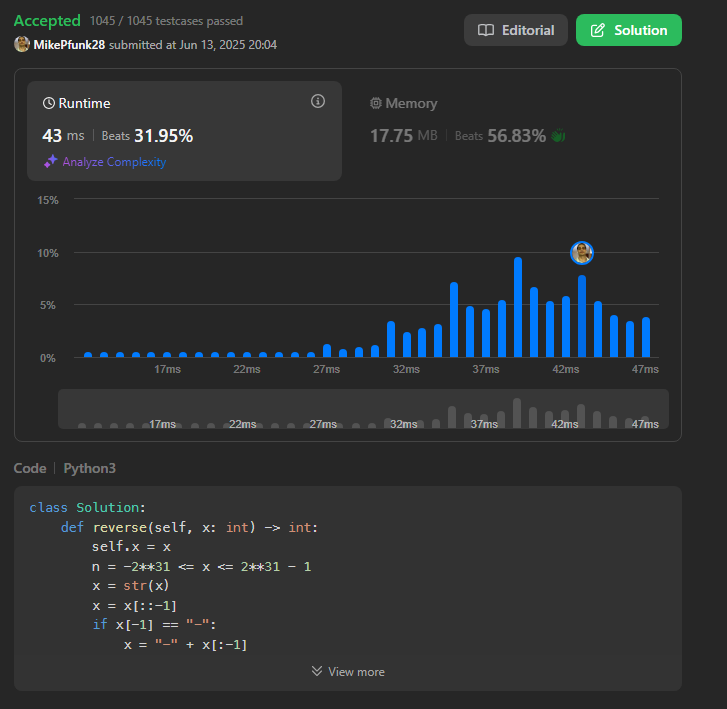